In [104]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## Загрузка  данных 308 строк

In [105]:
df = pd.read_csv('climate_change2.csv', nrows = 308)

In [106]:
zip_path = df

In [107]:
df

,Date Time,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983-5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983-6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983-7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983-8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983-9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...
303,2008-8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008-9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008-10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008-11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [108]:
df["Date Time"].astype(str) 


0       1983-5
1       1983-6
2       1983-7
3       1983-8
4       1983-9
        ...   
303     2008-8
304     2008-9
305    2008-10
306    2008-11
307    2008-12
Name: Date Time, Length: 308, dtype: object

In [109]:
df["Date Time"] = pd.to_datetime(df['Date Time'], format='%Y-%m')
df.info()
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date Time  308 non-null    datetime64[ns]
 1   MEI        308 non-null    float64       
 2   CO2        308 non-null    float64       
 3   CH4        308 non-null    float64       
 4   N2O        308 non-null    float64       
 5   CFC-11     308 non-null    float64       
 6   CFC-12     308 non-null    float64       
 7   TSI        308 non-null    float64       
 8   Aerosols   308 non-null    float64       
 9   Temp       308 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 24.2 KB


In [110]:
df.head()

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


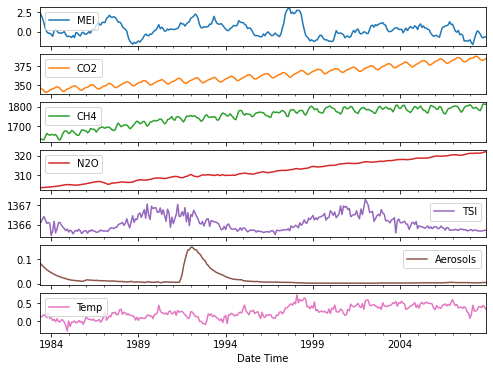

In [111]:
plot_cols = ['MEI', 'CO2', 'CH4', 'N2O', 'TSI', 'Aerosols', 'Temp']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)



In [112]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MEI,308.0,0.275555,0.937918,-1.6350,-0.39875,0.23750,0.83050,3.0010
CO2,308.0,363.226753,12.647125,340.1700,353.02000,361.73500,373.45500,388.5000
CH4,308.0,1749.824513,46.051678,1629.8900,1722.18250,1764.04000,1786.88500,1814.1800
N2O,308.0,312.391834,5.225131,303.6770,308.11150,311.50700,316.97900,322.1820
CFC-11,308.0,251.973068,20.231783,191.3240,246.29550,258.34400,267.03100,271.4940
CFC-12,308.0,497.524782,57.826899,350.1130,472.41075,528.35600,540.52425,543.8130
TSI,308.0,1366.070759,0.399610,1365.4261,1365.71705,1365.98090,1366.36325,1367.3162
Aerosols,308.0,0.016657,0.029050,0.0016,0.00280,0.00575,0.01260,0.1494
Temp,308.0,0.256776,0.179090,-0.2820,0.12175,0.24800,0.40725,0.7390


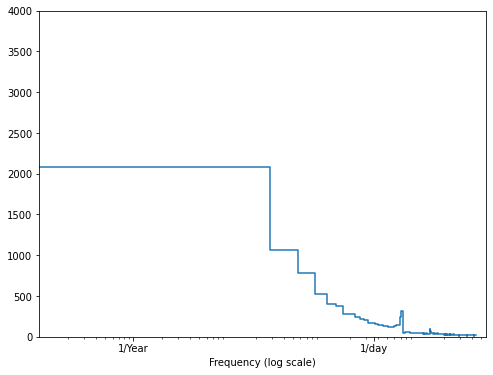

In [113]:
fft = tf.signal.rfft(df['CO2'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['CO2'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 4000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

### Разбиение на тренировочную и проверочную выборки

In [114]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

### Нормализация данных


In [115]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

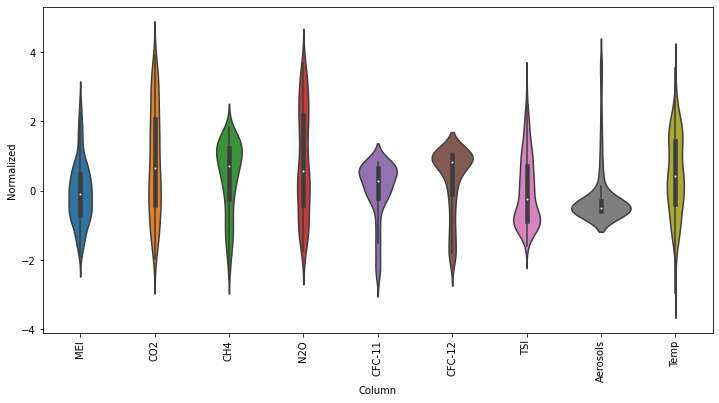

In [116]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

### Индексы и смещения

Начнём с создания `WindowGenerator` class. 
Метод init включает всю необходимую логику для индексов ввода и меток.

In [117]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [118]:
w1 = WindowGenerator(input_width=12, label_width=1, shift=12,
                     label_columns=['CO2'])
w1

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [23]
Label column name(s): ['CO2']

In [119]:
w2 = WindowGenerator(input_width=5, label_width=1, shift=1,
                     label_columns=['CO2'])
w2

Total window size: 6
Input indices: [0 1 2 3 4]
Label indices: [5]
Label column name(s): ['CO2']

###  Сплит

In [120]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

 
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [121]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 6, 9)
Inputs shape: (3, 5, 9)
Labels shape: (3, 1, 1)


Typically, data in TensorFlow is packed into arrays where the outermost index is across examples (the "batch" dimension). The middle indices are the "time" or "space" (width, height) dimension(s). The innermost indices are the features.

The code above took a batch of three 7-time step windows with 19 features at each time step. It splits them into a batch of 6-time step 19-feature inputs, and a 1-time step 1-feature label. The label only has one feature because the `WindowGenerator` was initialized with `label_columns=['T (degC)']`. Initially, this tutorial will build models that predict single output labels.

### 3. Сюжет (график)



In [122]:
w2.example = example_inputs, example_labels

In [123]:
def plot(self, model=None, plot_col='CO2', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [m]')

WindowGenerator.plot = plot

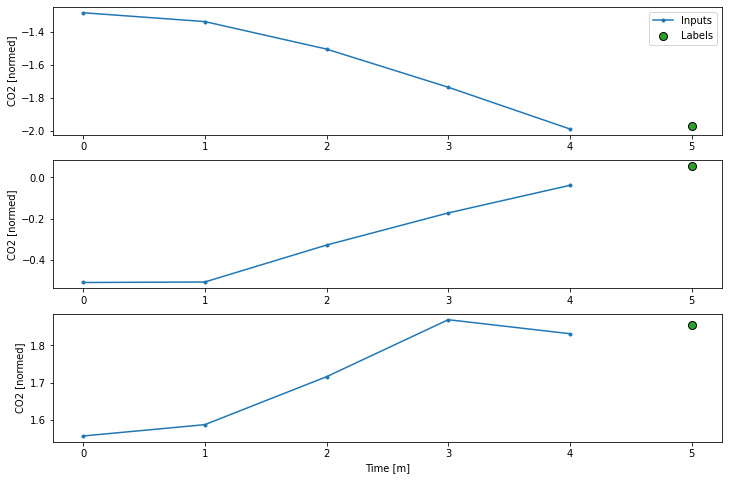

In [124]:
w2.plot(plot_col='CO2')

### 4. Создание `tf.data.Dataset`s

Итак,  `make_dataset` метод будет брать временной ряд DataFrame и преобразует в `tf.data.Dataset` из пар (`input_window`, `label_window`) с помощью функции `tf.keras.utils.timeseries_dataset_from_array` :

In [125]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=12,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

Объект  `WindowGenerator` содержит обучающие, проверочные и тестовые данные.

Добавим свойства для доступа к ним как `tf.data.Dataset`s с помощью метода `make_dataset`  , который  определили ранее. Кроме того, добавим стандартный пакет примеров для быстрого доступа и построения графиков:

In [126]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

Теперь объект `WindowGenerator` предоставляет вам доступ к объектам `tf.data.Dataset`, поэтому возможно легко перебирать данные.

Свойство `Dataset.element_spec` сообщает структуру, типы данных и формы элементов набора данных.

In [127]:
w2.train.element_spec

(TensorSpec(shape=(None, 5, 9), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

Итерация по `Dataset` дает конкретные партии:

In [128]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (12, 5, 9)
Labels shape (batch, time, features): (12, 1, 1)


## Одноступенчатые модели

Самая простая модель, которую можем построить на такого рода данных, — это модель, которая предсказывает значение одной функции — 1 временной шаг (один месяц) вперед, основываясь только на текущих условиях.

Настроим объект WindowGenerator для создания этих одношаговых пар (input, label) :

In [129]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['CO2'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['CO2']

Объект `window` создает `tf.data.Dataset` из обучающих, проверочных и тестовых наборов, что позволяет легко перебирать пакеты данных.


In [130]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (12, 1, 9)
Labels shape (batch, time, features): (12, 1, 1)


### Базовый уровень


In [131]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [132]:
baseline = Baseline(label_index=column_indices['CO2'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

6/6 [==============================] - 0s 4ms/step - loss: 0.0240 - mean_absolute_error: 0.1372


Итак, создадим более широкий `WindowGenerator` , который генерирует окна 12 месяца последовательных входных данных и меток за раз. Новая переменная `wide_window` не меняет способ работы модели. Модель по-прежнему делает прогнозы на один месяц вперед на основе одного входного временного шага. Здесь `time` ось действует как `batch` ось: каждый прогноз делается независимо, без взаимодействия между временными шагами:

In [133]:
wide_window = WindowGenerator(
    input_width=12, label_width=12, shift=1,
    label_columns=['CO2'])

wide_window

Total window size: 13
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Label column name(s): ['CO2']

In [134]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (12, 12, 9)
Output shape: (12, 12, 1)


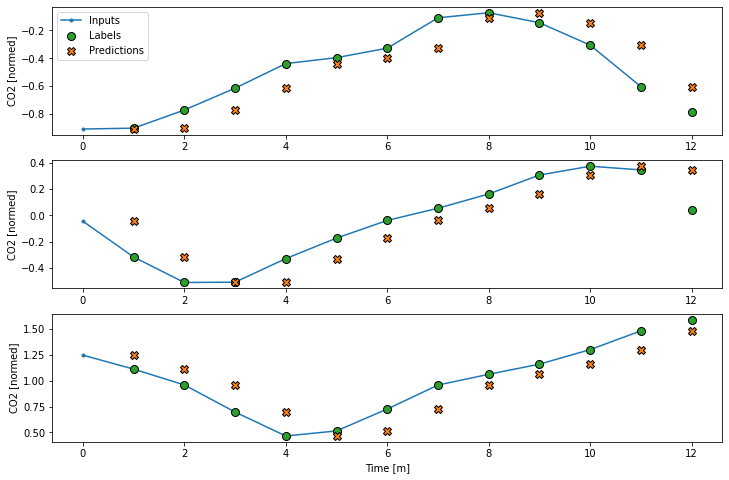

In [135]:
wide_window.plot(baseline)

### Линейная модель
Самая простая обучаемая модель, которую можем применить к этой задаче, — это вставить линейное преобразование между входом и выходом. В этом случае результат временного шага зависит только от этого шага

Слой `tf.keras.layers.Dense` без набора `activation` является линейной моделью. Слой преобразует только последнюю ось данных из (batch, time, inputs) в (batch, time, units) ; он применяется независимо к каждому элементу по осям batch и time .

In [136]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [137]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (12, 1, 9)
Output shape: (12, 1, 1)


### Обучение модели

In [138]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [139]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
18/18 [==============================] - 1s 16ms/step - loss: 4.8413 - mean_absolute_error: 1.8128 - val_loss: 13.0641 - val_mean_absolute_error: 3.4601
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 4.4843 - mean_absolute_error: 1.7418 - val_loss: 11.9680 - val_mean_absolute_error: 3.3040
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 4.1408 - mean_absolute_error: 1.6730 - val_loss: 10.9909 - val_mean_absolute_error: 3.1585
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 3.8329 - mean_absolute_error: 1.6096 - val_loss: 10.0550 - val_mean_absolute_error: 3.0133
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 3.5453 - mean_absolute_error: 1.5467 - val_loss: 9.1822 - val_mean_absolute_error: 2.8712
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 3.2753 - mean_absolute_error: 1.4859 - val_loss: 8.3883 - val_mean_absolute_error: 2.7362
Epoch 7/100
18/1

In [140]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (12, 12, 9)
Output shape: (12, 12, 1)


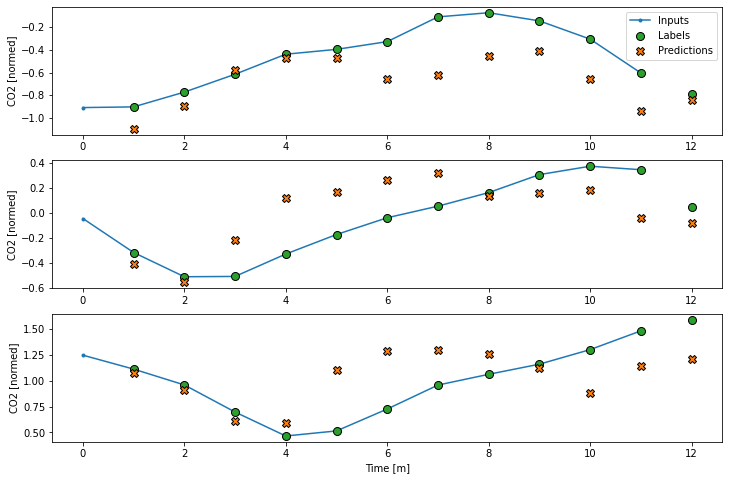

In [141]:
wide_window.plot(linear)

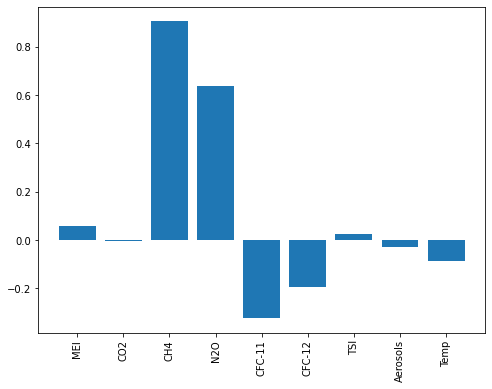

In [142]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

## Плотный



In [143]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
18/18 [==============================] - 2s 21ms/step - loss: 0.3060 - mean_absolute_error: 0.4195 - val_loss: 0.4822 - val_mean_absolute_error: 0.6111
Epoch 2/100
18/18 [==============================] - 0s 11ms/step - loss: 0.0734 - mean_absolute_error: 0.2175 - val_loss: 0.2493 - val_mean_absolute_error: 0.4276
Epoch 3/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0397 - mean_absolute_error: 0.1601 - val_loss: 0.2732 - val_mean_absolute_error: 0.4590
Epoch 4/100
18/18 [==============================] - 0s 11ms/step - loss: 0.0297 - mean_absolute_error: 0.1382 - val_loss: 0.2328 - val_mean_absolute_error: 0.4250
Epoch 5/100
18/18 [==============================] - 0s 14ms/step - loss: 0.0248 - mean_absolute_error: 0.1242 - val_loss: 0.1880 - val_mean_absolute_error: 0.3782
Epoch 6/100
18/18 [==============================] - 0s 16ms/step - loss: 0.0199 - mean_absolute_error: 0.1111 - val_loss: 0.1734 - val_mean_absolute_error: 0.3666
Epoch 7/100
18/18

## Многоступенчатый плотный
Одношаговая модель не имеет контекста для текущих значений входных данных. Он не может видеть, как входные объекты меняются с течением времени. Чтобы решить эту проблему, модели требуется доступ к нескольким временным шагам при прогнозировании:

In [144]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['CO2'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['CO2']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

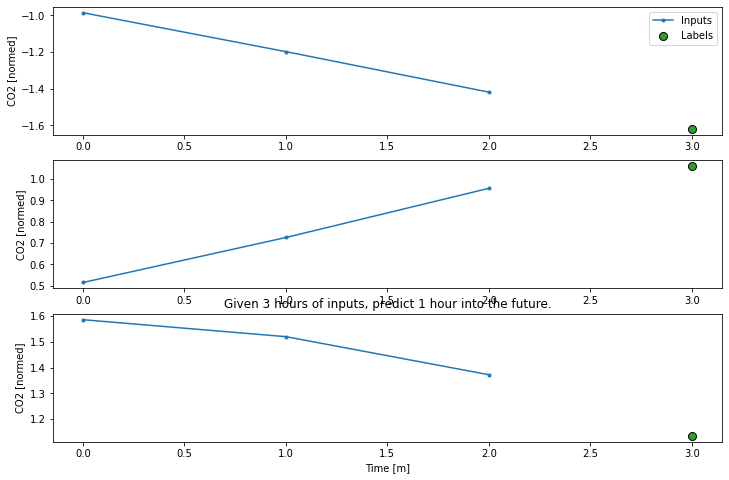

In [145]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [146]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [147]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (12, 3, 9)
Output shape: (12, 1, 1)


In [148]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

5/5 [==============================] - 0s 4ms/step - loss: 1.4531 - mean_absolute_error: 1.0181


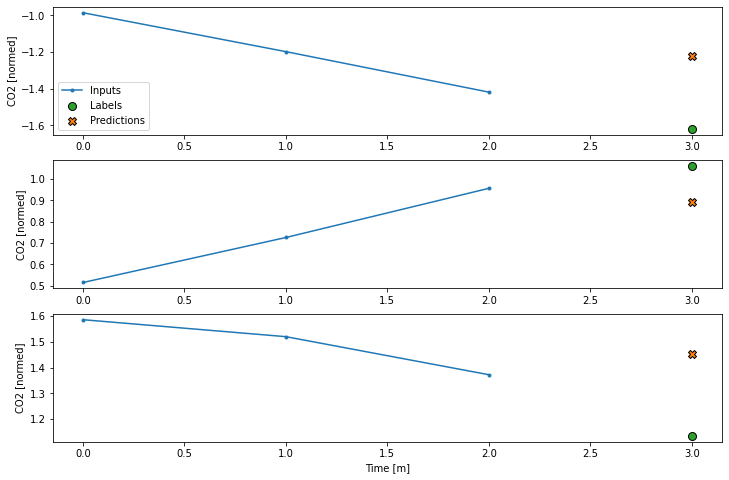

In [149]:
conv_window.plot(multi_step_dense)

### Сверточная нейронная сеть
 
Слой свертки ( `tf.keras.layers.Conv1D` ) также использует несколько временных шагов в качестве входных данных для каждого прогноза.

Ниже представлена ​​та же модель, что и в `multi_step_dense` , переписанная с помощью свертки.

Обратим внимание на изменения:

`tf.keras.layers.Flatten` и первый `tf.keras.layers.Dense` заменяются `tf.keras.layers.Conv1D . tf.keras.layers.Reshape` больше не нужен, так как свертка сохраняет ось времени в своих выходных данных.

In [150]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [151]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (12, 3, 9)
Output shape: (12, 1, 1)


In [152]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

5/5 [==============================] - 0s 4ms/step - loss: 0.3079 - mean_absolute_error: 0.4834


In [153]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (12, 12, 9)
Labels shape: (12, 12, 1)
Output shape: (12, 10, 1)


In [154]:
LABEL_WIDTH = 12
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['CO2'])

wide_conv_window

Total window size: 15
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14]
Label column name(s): ['CO2']

In [155]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (12, 14, 9)
Labels shape: (12, 12, 1)
Output shape: (12, 12, 1)


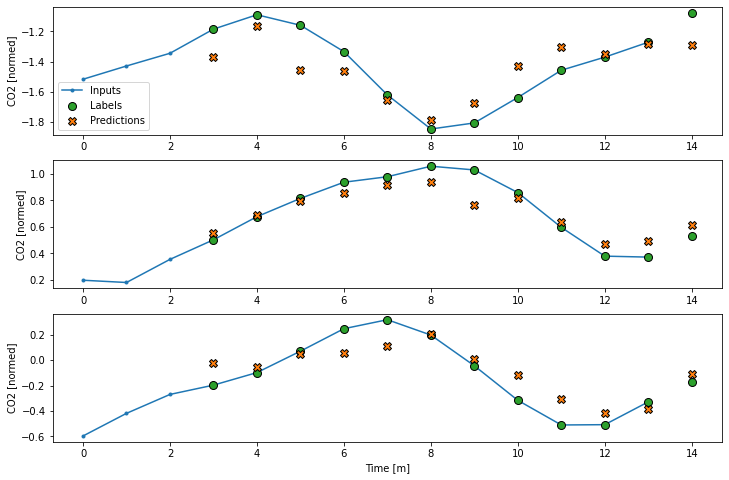

In [156]:
wide_conv_window.plot(conv_model)

### Рекуррентная нейронная сеть
Рекуррентная нейронная сеть (RNN) — это тип нейронной сети, хорошо подходящий для данных временных рядов. RNN обрабатывают временной ряд шаг за шагом, сохраняя внутреннее состояние от шага к шагу.

In [157]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units=1)
])

In [158]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (12, 12, 9)
Output shape: (12, 12, 1)


In [159]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

5/5 [==============================] - 0s 5ms/step - loss: 0.4316 - mean_absolute_error: 0.5915


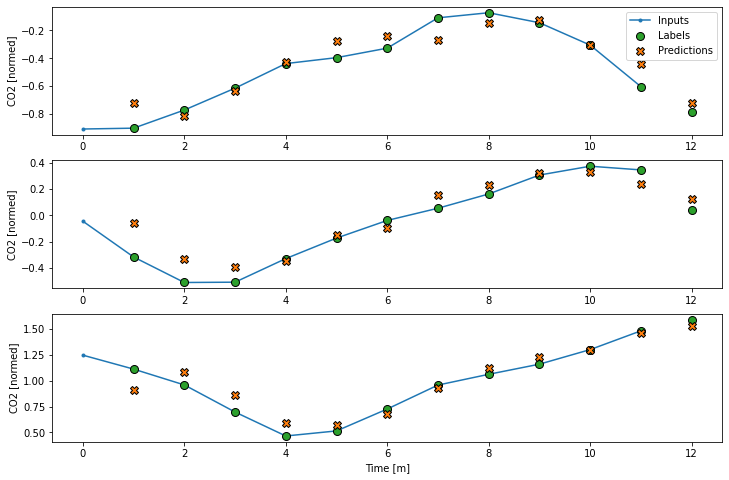

In [160]:
wide_window.plot(lstm_model)

### Представление

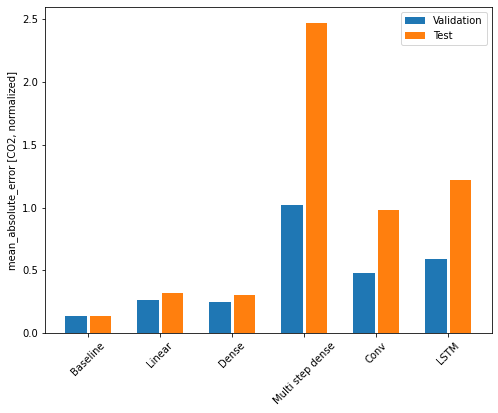

In [161]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [CO2, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [162]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.1389
Linear      : 0.3214
Dense       : 0.3026
Multi step dense: 2.4703
Conv        : 0.9841
LSTM        : 1.2229


### Модели с несколькими выходами


In [163]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=12, label_width=12, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (12, 12, 9)
Labels shape (batch, time, features): (12, 12, 9)


#### Базовый уровень


In [164]:
baseline = Baseline()
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [165]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

5/5 [==============================] - 0s 4ms/step - loss: 0.0777 - mean_absolute_error: 0.1450


#### Плотная

In [166]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [167]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

6/6 [==============================] - 0s 5ms/step - loss: 0.1772 - mean_absolute_error: 0.3225


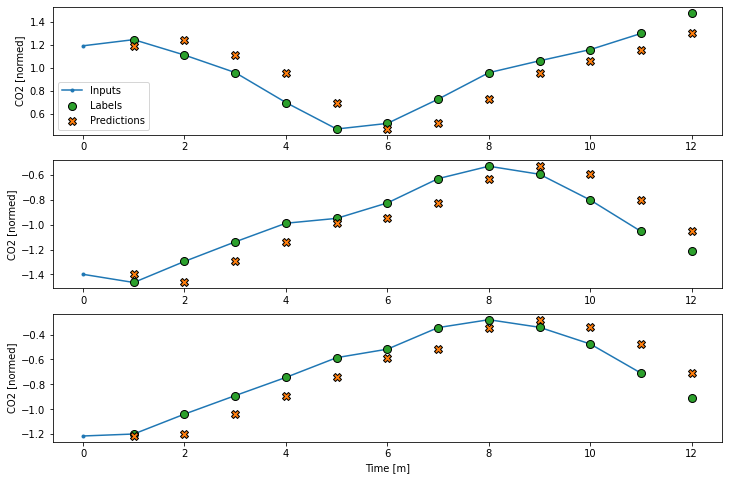

In [168]:
wide_window.plot(baseline)

#### Рекурентная нейронная сеть


In [169]:
%%time
wide_window = WindowGenerator(
    input_width=12, label_width=12, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

5/5 [==============================] - 0s 5ms/step - loss: 0.2823 - mean_absolute_error: 0.4095

CPU times: user 21.2 s, sys: 1.68 s, total: 22.9 s
Wall time: 25.1 s


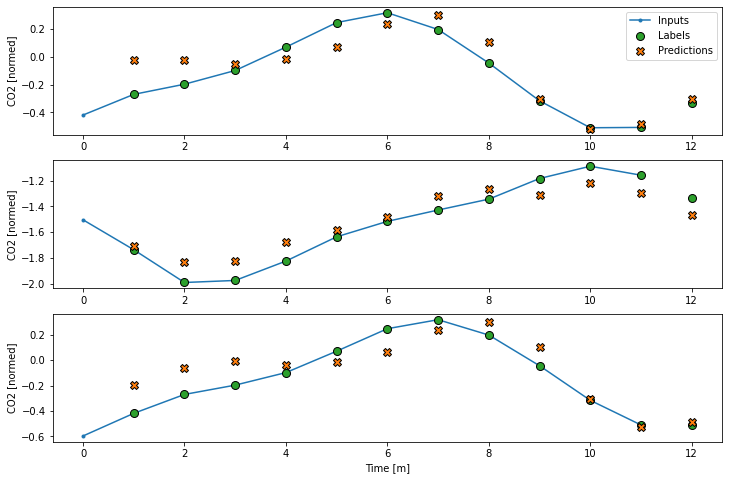

In [170]:
wide_window.plot(lstm_model)

#### Дополнительно: Остаточные соединения


In [171]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [172]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

5/5 [==============================] - 0s 5ms/step - loss: 0.0784 - mean_absolute_error: 0.1512

CPU times: user 4.75 s, sys: 161 ms, total: 4.91 s
Wall time: 4.71 s


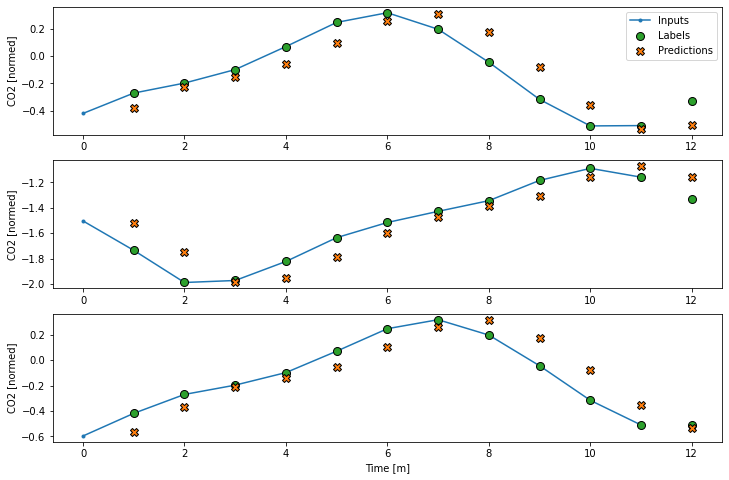

In [173]:
wide_window.plot(residual_lstm)

#### Представление

Общая производительность для моделей с несколькими выходами.

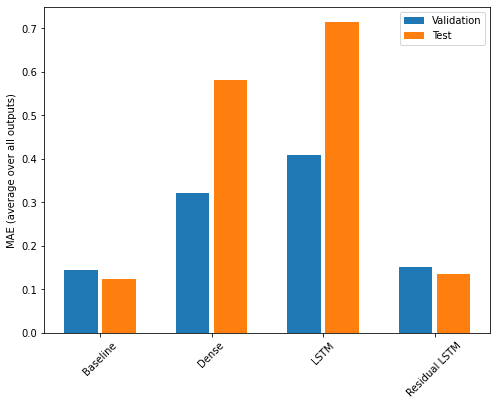

In [174]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [175]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.1245
Dense          : 0.5822
LSTM           : 0.7141
Residual LSTM  : 0.1358


## Многоступенчатые модели



Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [12 13 14 15 16 17 18 19 20 21 22 23]
Label column name(s): None

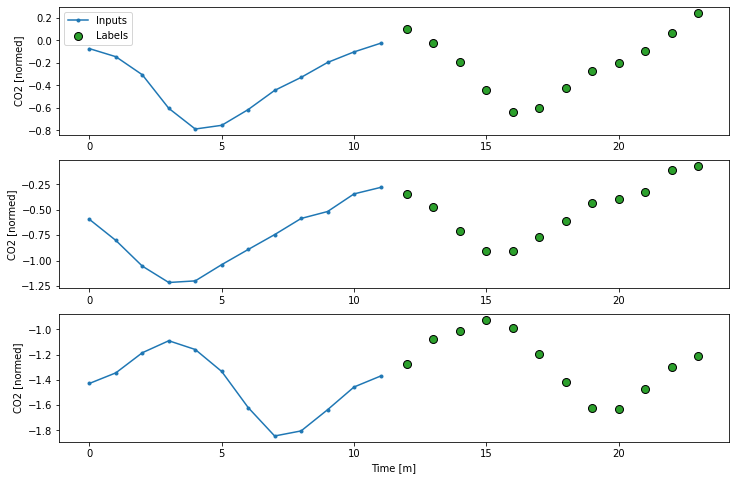

In [176]:
OUT_STEPS = 12
multi_window = WindowGenerator(input_width=12,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

### Базовый уровень

4/4 [==============================] - 0s 5ms/step - loss: 0.1599 - mean_absolute_error: 0.2471


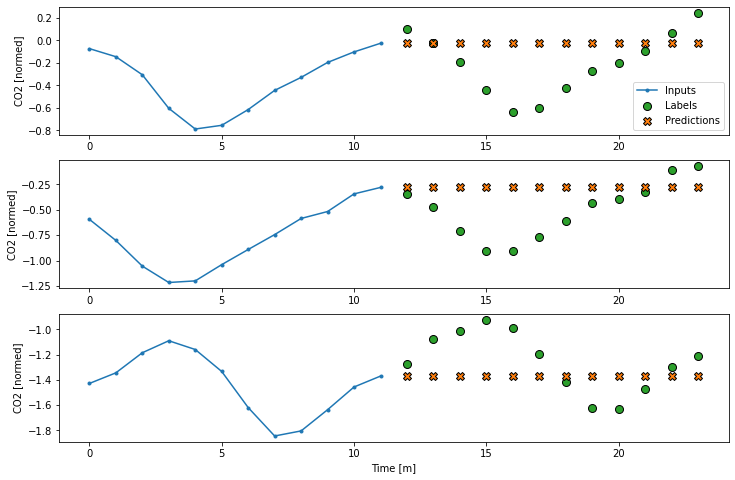

In [177]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

4/4 [==============================] - 0s 5ms/step - loss: 0.2106 - mean_absolute_error: 0.2875


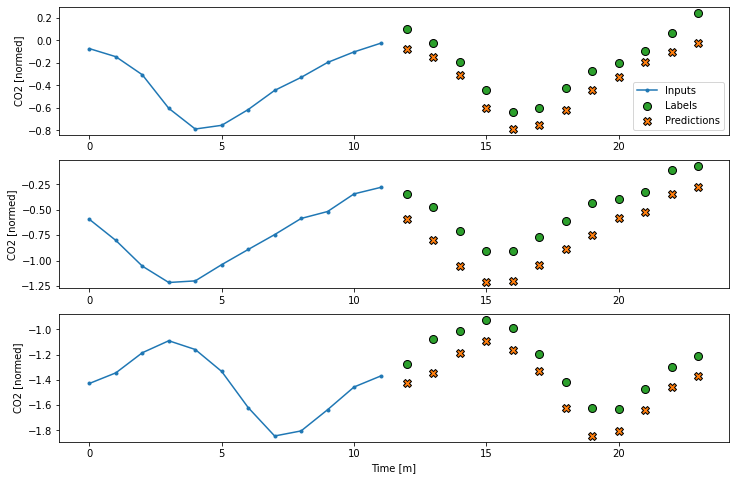

In [178]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### Одиночного-выстрела модели


4/4 [==============================] - 0s 5ms/step - loss: 0.3053 - mean_absolute_error: 0.4501


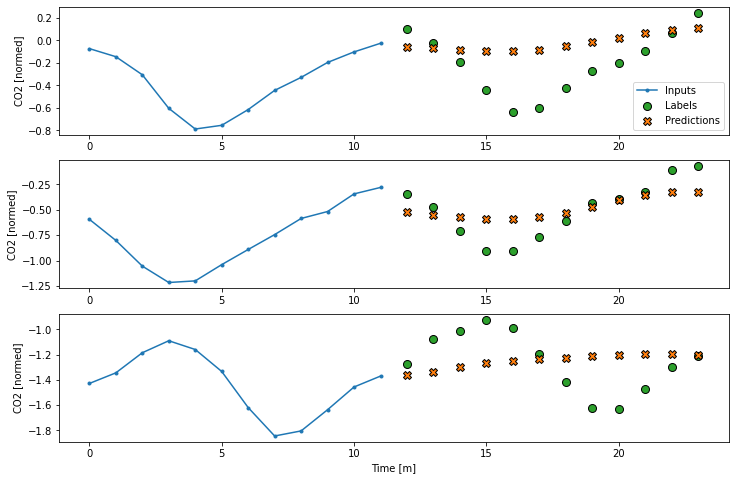

In [179]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

#### Dense


4/4 [==============================] - 0s 5ms/step - loss: 0.3341 - mean_absolute_error: 0.4381


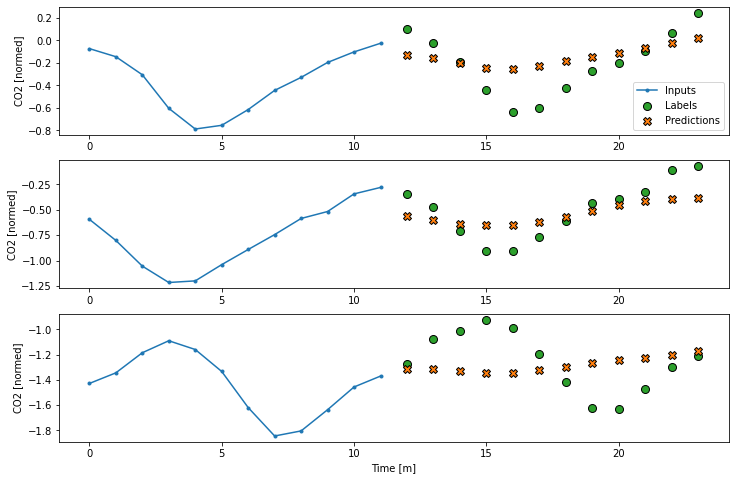

In [180]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

#### CNN

4/4 [==============================] - 0s 5ms/step - loss: 0.4269 - mean_absolute_error: 0.5266


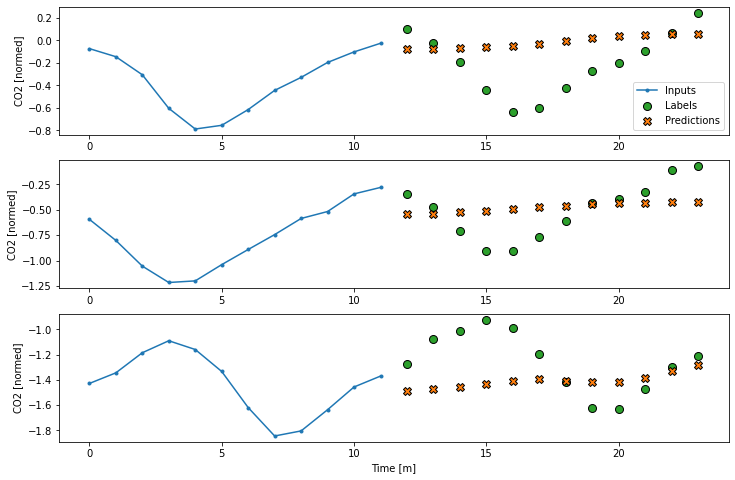

In [181]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

#### Рекурентная нейронная сеть

4/4 [==============================] - 0s 5ms/step - loss: 0.5817 - mean_absolute_error: 0.5992


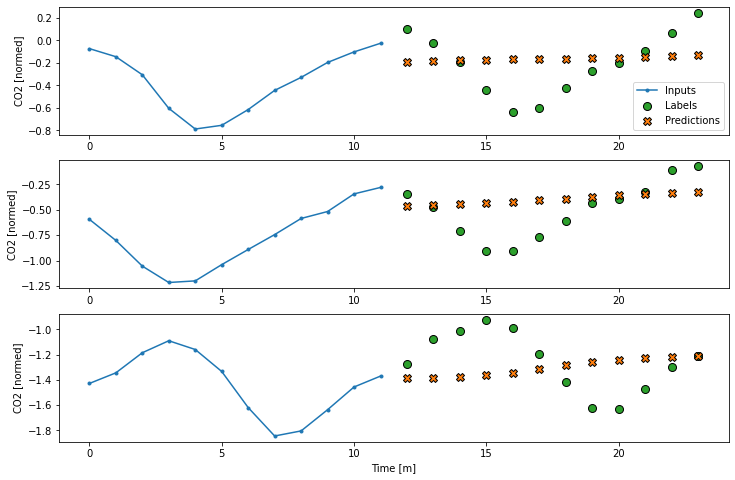

In [182]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

### Дополнительно: Авторегрессионная модель


#### Рекурентная нейронная сеть

In [183]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [184]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [185]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [186]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([12, 9])

In [187]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [188]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (12, 12, 9)


4/4 [==============================] - 0s 8ms/step - loss: 0.6101 - mean_absolute_error: 0.6153


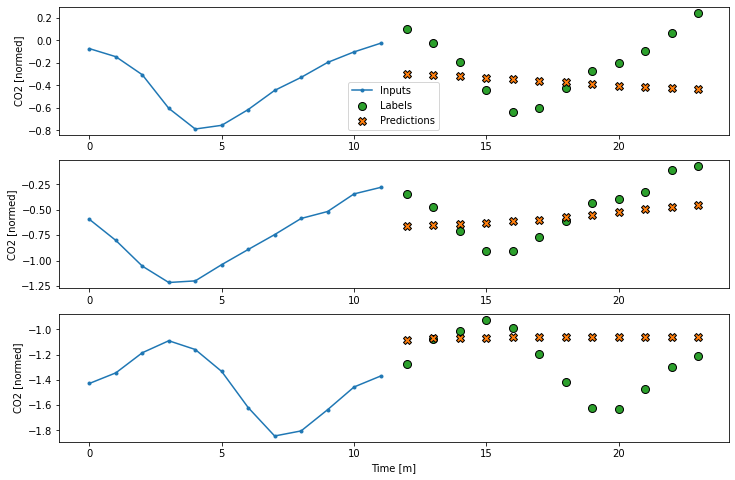

In [189]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)